#Importing necessary libraries

In [ ]:
import pandas as pd
import folium
import requests
from sklearn.cluster import KMeans
from folium.plugins import MarkerCluster
from matplotlib import pyplot as plt
import seaborn as sns

#Reading the Following excel files:


*   CAB_DETAILS - Consists the details of Cab
*   EMPLOYEES - Consists of Employee Details
*   updated_LOCATIONS - Consists of Employees pick - up location, i.e areas




In [ ]:
cab_details = pd.read_excel('CAB_DETAILS.xlsx')
employees = pd.read_excel('EMPLOYEES.xlsx')
uptd_loc = pd.read_excel('Merged_Clusters_Employees.xlsx')

#Showing CAB Details, Employee Details & Location Details

In [ ]:
# Display the first few rows of each dataframe to understand their structure
print("CAB_DETAILS:")
print(cab_details.head())

print("\nEMPLOYEES:")
print(employees.head())


print("\nMerged_Clusters_Employees:")
print(uptd_loc.head())

CAB_DETAILS:
    CAB_ID     CAB_NUMBER    DRIVER_NAME            PHONE VEHICLE_TYPE  \
0  CAB_001  TN 38 CH 4527    Aarav Patel  +91 82323 76410        SEDAN   
1  CAB_002  TN 38 CH 4528    Arjun Mehta  +91 82323 76411        SEDAN   
2  CAB_003  TN 38 CH 4529  Bhavesh Reddy  +91 82323 76412        SEDAN   
3  CAB_004  TN 38 CH 4530     Dhruv Shah  +91 82323 76413          SUV   
4  CAB_005  TN 38 CH 4531    Farhan Khan  +91 82323 76414          SUV   

   CAPACITY  
0         4  
1         4  
2         4  
3         5  
4         5  

EMPLOYEES:
   INDEX_ID      EMP_ID EMPLOYEE_NAME  GENDER OFFICE_BUILDING   \
0         1  VTS2025001         Aarav    Male        THE HIVE    
1         2  VTS2025002        Ananya  Female        THE HIVE    
2         3  VTS2025003         Aditi  Female        THE HIVE    
3         4  VTS2025004         Arnav    Male        THE HIVE    
4         5  VTS2025005        Vikram    Male        THE HIVE    

  OFFICE_LOCATION  OFFICE_LOCATION_LAT  OFFICE_LO

#Visual Representation of Employees and Vehicles List

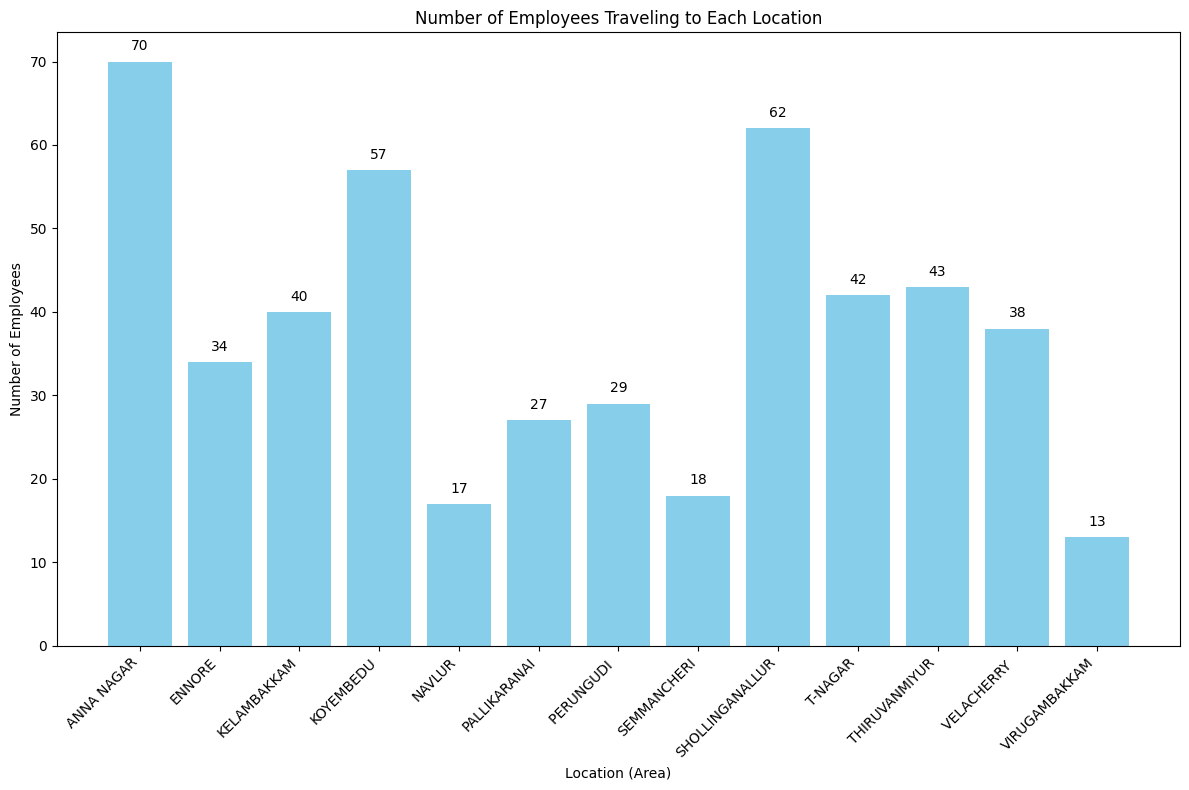

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by AREA and count the number of unique EMP_IDs in each area
grouped_df = uptd_loc.groupby('AREA')['EMP_ID'].nunique().reset_index(name='Number of Employees')

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(grouped_df['AREA'], grouped_df['Number of Employees'], color='skyblue')

# Adding the count labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom')

plt.xlabel('Location (Area)')
plt.ylabel('Number of Employees')
plt.title('Number of Employees Traveling to Each Location')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent clipping of tick labels
plt.show()


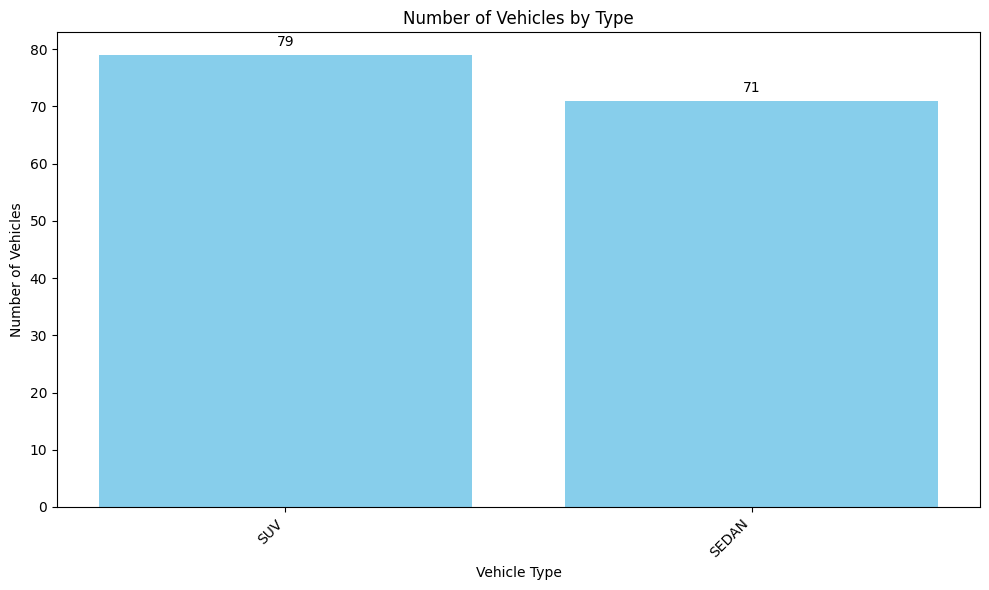

In [ ]:
# Count the number of vehicles for each type
vehicle_counts = cab_details['VEHICLE_TYPE'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(vehicle_counts.index, vehicle_counts.values, color='skyblue')

# Adding the count labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles by Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent clipping of tick labels
plt.show()

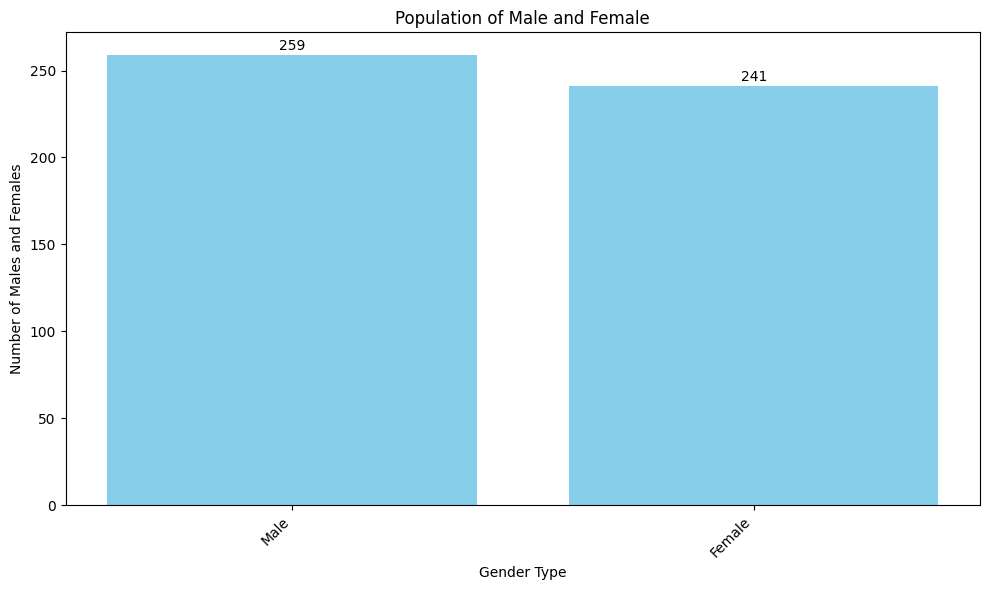

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'employees' is your DataFrame containing the 'GENDER' column
gender_counts = employees['GENDER'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(gender_counts.index, gender_counts.values, color='skyblue')

# Adding the count labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom')

plt.xlabel('Gender Type')
plt.ylabel('Number of Males and Females')
plt.title('Population of Male and Female')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent clipping of tick labels
plt.show()


#Finding the Optimal *K Value* using Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

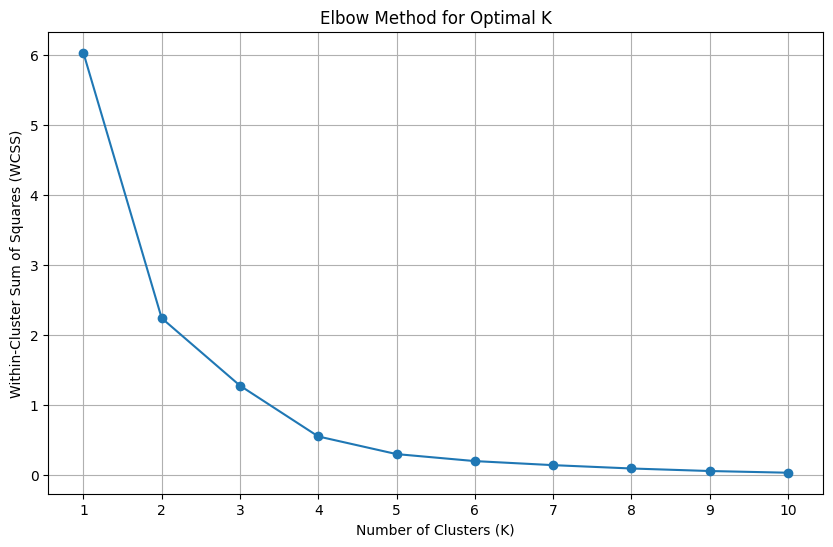

In [ ]:
k_values = range(1, 11)
wcss = []
employee_locations = uptd_loc[['LATITUDE', 'LONGITUDE']]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(employee_locations)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.xticks(k_values)
plt.show()


#Scatter Plot using Centroids

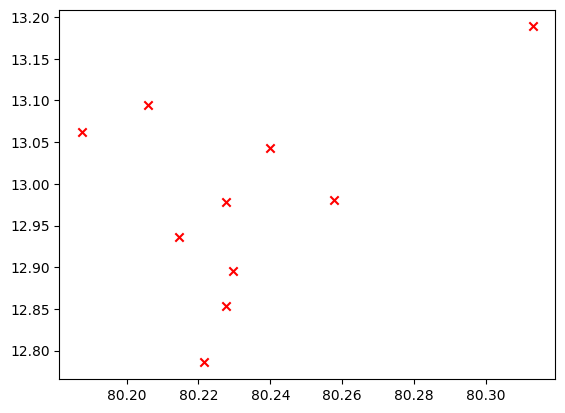

In [ ]:
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 0], marker='x', color='red')

#Geopandas for Geo-visualization

<ipython-input-9-bd2d0ef610f4>:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


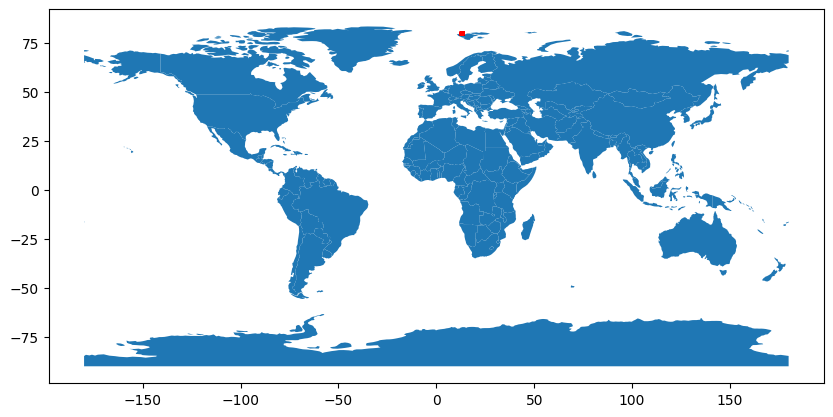

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

def plot_clusters_geopandas(uptd_loc):
    geometry = [Point(xy) for xy in zip(uptd_loc['LATITUDE'], uptd_loc['LONGITUDE'])]
    geo_df = gpd.GeoDataFrame(uptd_loc, geometry=geometry)

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    ax = world.plot(figsize=(10, 8))

    geo_df.plot(ax=ax, marker='o', color='red', markersize=5)
    plt.show()

plot_clusters_geopandas(uptd_loc)

#Adding Tom Tom API for finding:



*   Shortest Routes
*   Traffic Conditions



In [ ]:
tomtom_api_key = '4VAIAvF0o7g6gIF6oj7lgSbHWDekpATt'
tomtom_base_url = 'https://api.tomtom.com/routing/1/calculateRoute/'
def get_route(start_coords, end_coords):
    url = f"{tomtom_base_url}{start_coords}:{end_coords}/json"
    params = {
        'key': tomtom_api_key,
        'traffic': 'true',
        'routeType': 'shortest'
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None

#Calculating the distance between employee's pick - up location to the office location

In [ ]:
from math import radians, sin, cos, sqrt, atan2

def calculate_distance(lat1, lon1, lat2, lon2):

    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    R = 6371.0

    distance = R * c
    return distance


#Showing each and every columns for the listed datasets

In [ ]:
uptd_loc = pd.read_excel('Merged_Clusters_Employees.xlsx')
EMPLOYEES = pd.read_excel('EMPLOYEES.xlsx')
cab_details = pd.read_excel('CAB_DETAILS.xlsx')

# Check columns in both datasets
print("uptd_loc columns:", uptd_loc.columns)
print("EMPLOYEES columns:", EMPLOYEES.columns)
print("cab_details:", cab_details.columns )

uptd_loc columns: Index(['INDEX_ID', 'EMP_ID', 'LATITUDE', 'LONGITUDE', 'CAB_NUMBER', 'GENDER',
       'CAPACITY', 'CAB_ID', 'AREA', 'EMPLOYEE_NAME', 'CONTACT_NUMBER'],
      dtype='object')
EMPLOYEES columns: Index(['INDEX_ID', 'EMP_ID', 'EMPLOYEE_NAME', 'GENDER', 'OFFICE_BUILDING ',
       'OFFICE_LOCATION', 'OFFICE_LOCATION_LAT', 'OFFICE_LOCATION_LON',
       'CONTACT_NUMBER', 'EMERGENCY_CONTACT_NUMBER'],
      dtype='object')
cab_details: Index(['CAB_ID', 'CAB_NUMBER', 'DRIVER_NAME', 'PHONE', 'VEHICLE_TYPE',
       'CAPACITY'],
      dtype='object')


#Implementing K - Means & Dividing 108 clusters

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Load the Merged_Clusters_Employees dataset
merged_clusters_employees = pd.read_excel('Merged_Clusters_Employees.xlsx')

# Check if the required columns are present
required_columns = ['EMP_ID', 'CAB_ID', 'CAB_NUMBER', 'LATITUDE', 'LONGITUDE', 'EMPLOYEE_NAME', 'CONTACT_NUMBER']
for col in required_columns:
    if col not in merged_clusters_employees.columns:
        raise KeyError(f"'{col}' column is missing in Merged_Clusters_Employees dataset.")

# Use the loaded dataset directly
uptd_loc = merged_clusters_employees.copy()

# Check the number of rows
print(f"Total rows in Merged_Clusters_Employees: {merged_clusters_employees.shape[0]}")
print(f"Total rows in uptd_loc after loading: {uptd_loc.shape[0]}")

# Perform clustering if not done already
if 'Cluster' not in uptd_loc.columns:
    number_of_clusters = 108  # Adjust based on your requirements
    kmeans = KMeans(n_clusters=number_of_clusters, n_init=10)  # Set n_init to suppress FutureWarning
    uptd_loc['Cluster'] = kmeans.fit_predict(uptd_loc[['LATITUDE', 'LONGITUDE']])

# Check if cluster column was added correctly
print(f"Number of unique clusters: {uptd_loc['Cluster'].nunique()}")

# Save the clustered data to a new file
uptd_loc.to_csv('Clustered_Employees.csv', index=False)


Total rows in Merged_Clusters_Employees: 490
Total rows in uptd_loc after loading: 490
Number of unique clusters: 108


In [ ]:
import plotly.express as px

def plot_clusters_plotly(uptd_loc):
    fig = px.scatter_mapbox(
        uptd_loc,
        lat='LATITUDE',
        lon='LONGITUDE',
        color='Cluster',
        zoom=10,
        mapbox_style="carto-positron"
    )
    fig.show()

plot_clusters_plotly(uptd_loc)

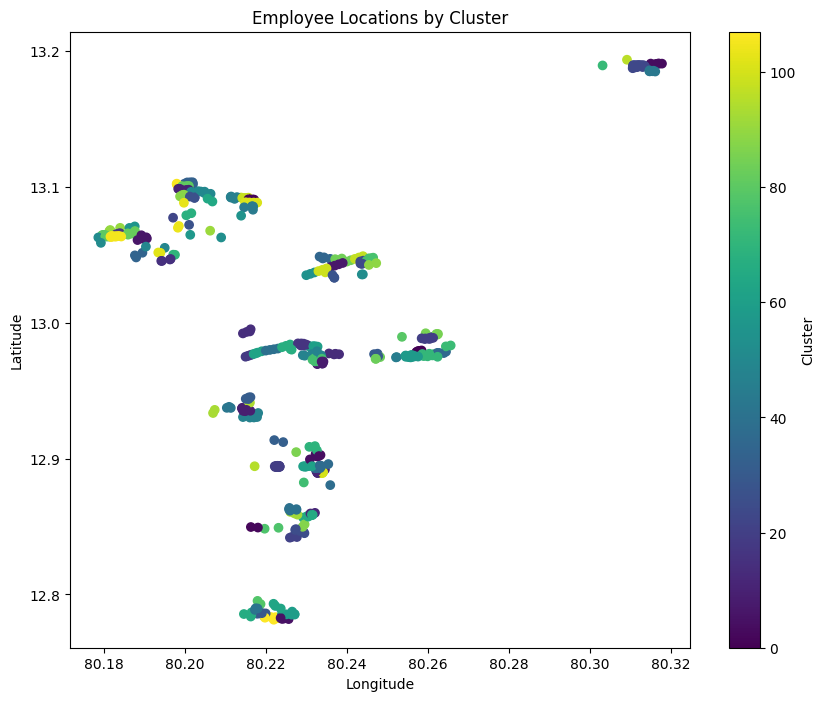

In [ ]:
import matplotlib.pyplot as plt

def plot_clusters(uptd_loc):
    plt.figure(figsize=(10, 8))
    plt.scatter(uptd_loc['LONGITUDE'], uptd_loc['LATITUDE'], c=uptd_loc['Cluster'], cmap='viridis')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Employee Locations by Cluster')
    plt.colorbar(label='Cluster')
    plt.show()

plot_clusters(uptd_loc)

#Visualizing the routes and traffic conditions using Folium

In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geopy.distance import geodesic
import matplotlib.pyplot as plt

def generate_colors(n):
    """
    Generate a list of colors.
    """
    cmap = plt.get_cmap("tab20")  # Using tab20 for up to 20 colors
    colors = [cmap(i / n) for i in range(n)]
    return [f'#{int(color[0] * 255):02x}{int(color[1] * 255):02x}{int(color[2] * 255):02x}' for color in colors]

def calculate_eta(distance_km, average_speed_kmh=50):
    """
    Calculate ETA based on distance and average speed.
    """
    # Convert average speed from km/h to km/min
    average_speed_km_per_min = average_speed_kmh / 60
    eta_minutes = distance_km / average_speed_km_per_min
    return eta_minutes

def assign_priority(uptd_loc, office_location, max_priority=5):
    """
    Assign a priority order (1 to max_priority) to each EMP_ID within each CAB_ID based on distance to the office.
    """
    uptd_loc['Distance_to_Office'] = uptd_loc.apply(
        lambda row: geodesic((row['LATITUDE'], row['LONGITUDE']), office_location).km, axis=1
    )

    uptd_loc['Priority'] = uptd_loc.groupby('CAB_ID')['Distance_to_Office'].rank("dense", ascending=True)
    uptd_loc['Priority'] = uptd_loc['Priority'].clip(upper=max_priority)  # Ensure priority doesn't exceed max_priority
    return uptd_loc

def visualize_routes_with_traffic(uptd_loc, office_location):
    office_map = folium.Map(location=office_location, zoom_start=12)

    # Add office location marker with a custom office logo icon
    office_icon = folium.CustomIcon(
        icon_image='https://static.vecteezy.com/system/resources/previews/014/538/046/original/office-location-illustration-on-a-background-premium-quality-symbols-icons-for-concept-and-graphic-design-vector.jpg',
        icon_size=(50, 50)
    )

    folium.Marker(
        location=office_location,
        popup='VTS Enterprises India Pvt Ltd',
        icon=office_icon
    ).add_to(office_map)

    marker_cluster = MarkerCluster().add_to(office_map)

    # Get unique clusters and assign colors
    if 'Cluster' not in uptd_loc.columns:
        raise KeyError("The 'Cluster' column is missing. Please ensure clustering is performed correctly.")

    unique_clusters = uptd_loc['Cluster'].unique()
    cluster_colors = generate_colors(len(unique_clusters))  # Generate colors based on the number of clusters

    color_map = dict(zip(unique_clusters, cluster_colors))


    for _, employee in uptd_loc.iterrows():
        latitude = float(employee['LATITUDE'])
        longitude = float(employee['LONGITUDE'])

        distance = employee['Distance_to_Office']

        # Calculate ETA based on distance and assumed average speed
        eta_minutes = calculate_eta(distance)

        # Ensure CONTACT_NUMBER exists, otherwise handle it
        contact_number = employee.get('CONTACT_NUMBER', 'N/A')

        # Ensure EMPLOYEE_NAME exists, otherwise handle it
        employee_name = employee.get('EMPLOYEE_NAME', 'N/A')

        # Create popup with detailed info
        cab_id = employee['CAB_ID']
        cab_number = employee['CAB_NUMBER']
        priority = int(employee['Priority'])  # Ensure priority is an integer
        cluster_id = employee['Cluster']

        popup_style = """
        <style>
            .custom-popup {
                width: 300px; /* Adjust the width as needed */
                height: 150px; /* Adjust the height as needed */
                overflow: auto; /* Allows scrolling if content exceeds height */
            }
        </style>
        """

        popup_html = f"""
        {popup_style}
        <div class="custom-popup">
            <b>Employee ID:</b> {employee['EMP_ID']}<br>
            <b>Name:</b> {employee_name}<br>
            <b>Contact Number: </b>{contact_number}<br>
            <b>Area: </b>{employee['AREA']}<br>
            <b>Distance to Office: </b>{distance:.2f} km<br>
            <b>ETA to Office: </b>{eta_minutes:.2f} minutes<br>
            <b>CAB_ID: </b>{cab_id}<br>
            <b>CAB_NUMBER:</b> {cab_number}<br>
            <b>Priority Order:</b> {priority}<br>
        </div>
        """

        # Add markers for employees
        folium.Marker(
            location=[latitude, longitude],
            popup=folium.Popup(popup_html, max_width=300),
            icon=folium.Icon(color=color_map[cluster_id])
        ).add_to(marker_cluster)

        # Draw route from employee location to office
        start_coords = f"{latitude},{longitude}"
        end_coords = f"{office_location[0]},{office_location[1]}"
        route_info = get_route(start_coords, end_coords)  # Assuming this function exists
        if route_info:
            points = route_info['routes'][0]['legs'][0]['points']
            route_coords = [(point['latitude'], point['longitude']) for point in points]

            traffic_delay = route_info['routes'][0]['summary']['trafficDelayInSeconds']

            if traffic_delay > 600:
                route_color = 'red'
            elif traffic_delay > 300:
                route_color = 'orange'
            else:
                route_color = 'green'

            folium.PolyLine(route_coords, color=route_color, weight=2.5).add_to(office_map)

    office_map.save('routes_with_traffic.html')
    return office_map

# Load the clustered dataset
uptd_loc = pd.read_csv('Clustered_Employees.csv')

# Assign priorities based on distance within each CAB_ID
office_location = [12.981255272581075, 80.25090453471675]  # Replace with your office location
uptd_loc = assign_priority(uptd_loc, office_location, max_priority=5)  # Adjust max_priority as needed

# Visualize routes with traffic
visualize_routes_with_traffic(uptd_loc, office_location)


Output hidden; open in https://colab.research.google.com to view.